In [19]:
import numpy as np
import pandas as pd

# Example: Assume we have a pandas DataFrame with data
num_samples = 100 # or number of storms in our case
time_steps = np.round(np.random.uniform(5, 15, 100),0) # or number of hours in our case
num_features = 5 # or number of variables in our case

# Generating a sample DataFrame for illustration
data = [np.random.rand(num_samples * step, num_features) for step in time_steps]
df = pd.DataFrame(data, columns=[f'feature_{i+1}' for i in range(num_features)])

# Assuming the DataFrame is organized with time_steps per sample
# This reshaping assumes the data is organized such that⁄ each 'block' of time_steps belongs to one sample
data_3d = df.values.reshape(num_samples, time_steps, num_features)

# Now data_3d is ready for use with an LSTM
print(data_3d.shape)  # Should print (100, 10, 5)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [4]:
import pandas as pd

os = 'win'

if os == 'win':
    path = 'C:/Users/fabau/OneDrive/Documents/GitHub/master-project/'
else:
    path = '/Users/fabienaugsburger/Documents/GitHub/master-project/'

def split_variable_level(variable_with_level):
    parts = variable_with_level.rsplit('_', 1)
    if len(parts) == 2 and parts[1].isdigit():
        return parts[0], parts[1]
    else:
        return variable_with_level, 0

# Read the list of variables
name_of_variables = pd.read_csv(f'{path}variable_list_24_v5.csv')
#name_of_variables = name_of_variables['variable'].tolist()

# Define the dataset to use
dataset = 'datasets_1h'
missing = []

# Create a new list of variables
#new_name_of_variables = []
for idx, row in name_of_variables.iterrows():
    variable = split_variable_level(row['variables'])[0]
    level = split_variable_level(row['variables'])[1]
    print(variable, level)

    locals()[f'max_{variable}_{level}'] = pd.DataFrame()
    locals()[f'min_{variable}_{level}'] = pd.DataFrame()
    locals()[f'mean_{variable}_{level}'] = pd.DataFrame()
    locals()[f'sigma_{variable}_{level}'] = pd.DataFrame()

    for j in range(1, 96 + 1):
    #if level == 'pl':
        #for lvl in level:
            try:
                    df_max_temp = pd.read_csv(f'{path}DATASETS/{dataset}/{variable}/storm_{j}/max_{j}_{level}.csv')
                    df_min_temp = pd.read_csv(f'{path}DATASETS/{dataset}/{variable}/storm_{j}/min_{j}_{level}.csv')
                    df_mean_temp = pd.read_csv(f'{path}DATASETS/{dataset}/{variable}/storm_{j}/mean_{j}_{level}.csv')
                    df_sigma_temp = pd.read_csv(f'{path}DATASETS/{dataset}/{variable}/storm_{j}/std_{j}_{level}.csv')
                    #print(f'File for storm {j} and variable {variable} found.')
            except FileNotFoundError:
                ds_missing = missing.append(f'{variable}_{level}')
                #print(f"File for storm {j}, variable {variable}, and level {level} not found.")
                continue
                    # Check if the columns exist before dropping/renaming
            if 'Unnamed: 0' in df_max_temp.columns:
                df_max_temp = df_max_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_min_temp.columns:
                df_min_temp = df_min_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_mean_temp.columns:
                df_mean_temp = df_mean_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_sigma_temp.columns:
                df_sigma_temp = df_sigma_temp.drop(columns=['Unnamed: 0'])

            if '0' in df_max_temp.columns:
                df_max_temp = df_max_temp.rename(columns={'0': f'storm_{j}'})
            if '0' in df_min_temp.columns:
                df_min_temp = df_min_temp.rename(columns={'0': f'storm_{j}'})
            if '0' in df_mean_temp.columns:
                df_mean_temp = df_mean_temp.rename(columns={'0': f'storm_{j}'})
            if '0' in df_sigma_temp.columns:
                df_sigma_temp = df_sigma_temp.rename(columns={'0': f'storm_{j}'})

            locals()[f'max_{variable}_{level}'] = pd.concat([locals()[f'max_{variable}_{level}'], df_max_temp], axis=1)
            locals()[f'min_{variable}_{level}'] = pd.concat([locals()[f'min_{variable}_{level}'], df_min_temp], axis=1)
            locals()[f'mean_{variable}_{level}'] = pd.concat([locals()[f'mean_{variable}_{level}'], df_mean_temp], axis=1)
            locals()[f'sigma_{variable}_{level}'] = pd.concat([locals()[f'sigma_{variable}_{level}'], df_sigma_temp], axis=1)

'''        else:
            try:
                    df_max_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/max_{j}_0.csv')
                    df_min_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/min_{j}_0.csv')
                    df_mean_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/mean_{j}_0.csv')
                    df_sigma_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/std_{j}_0.csv')
                    #print(f'File for storm {j} and variable {variable} found.')
            except FileNotFoundError:
                ds_missing = missing.append(f'{variable}_{level}')
                #print(f"File for storm {j}, variable {variable}, and level {level} not found.")
                continue
            # Check if the columns exist before dropping/renaming
            if 'Unnamed: 0' in df_max_temp.columns:
                df_max_temp = df_max_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_min_temp.columns:
                df_min_temp = df_min_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_mean_temp.columns:
                df_mean_temp = df_mean_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_sigma_temp.columns:
                df_sigma_temp = df_sigma_temp.drop(columns=['Unnamed: 0'])

            if '0' in df_max_temp.columns:
                df_max_temp = df_max_temp.rename(columns={'0': f'storm_{j}_level_0'})
            if '0' in df_min_temp.columns:
                df_min_temp = df_min_temp.rename(columns={'0': f'storm_{j}_level_0'})
            if '0' in df_mean_temp.columns:
                df_mean_temp = df_mean_temp.rename(columns={'0': f'storm_{j}_level_0'})
            if '0' in df_sigma_temp.columns:
                df_sigma_temp = df_sigma_temp.rename(columns={'0': f'storm_{j}_level_0'})

            locals()[f'max_{variable}'] = pd.concat([locals()[f'max_{variable}'], df_max_temp], axis=1)
            locals()[f'min_{variable}'] = pd.concat([locals()[f'min_{variable}'], df_min_temp], axis=1)
            locals()[f'mean_{variable}'] = pd.concat([locals()[f'mean_{variable}'], df_mean_temp], axis=1)
            locals()[f'sigma_{variable}'] = pd.concat([locals()[f'sigma_{variable}'], df_sigma_temp], axis=1)'''

10m_u_component_of_wind 0
10m_v_component_of_wind 0
2m_dewpoint_temperature 0
2m_temperature 0
convective_available_potential_energy 0
convective_precipitation 0
convective_rain_rate 0
convective_snowfall 0
geopotential 500
geopotential 1000
high_cloud_cover 0
instantaneous_10m_wind_gust 0
k_index 0
land_sea_mask 0
large_scale_precipitation 0
large_scale_snowfall 0
mean_large_scale_precipitation_rate 0
mean_top_net_long_wave_radiation_flux 0
mean_top_net_short_wave_radiation_flux 0
mean_total_precipitation_rate 0
mean_sea_level_pressure 0
mean_surface_latent_heat_flux 0
mean_surface_net_long_wave_radiation_flux 0
mean_surface_net_short_wave_radiation_flux 0
mean_vertically_integrated_moisture_divergence 0
relative_humidity 10
relative_humidity 20
relative_humidity 30
relative_humidity 50
relative_humidity 70
relative_humidity 100
relative_humidity 150
relative_humidity 200
relative_humidity 250
relative_humidity 300
relative_humidity 400
relative_humidity 500
relative_humidity 600
rela

'        else:\n            try:\n                    df_max_temp = pd.read_csv(f\'{path}{dataset}/{variable}/storm_{j}/max_{j}_0.csv\')\n                    df_min_temp = pd.read_csv(f\'{path}{dataset}/{variable}/storm_{j}/min_{j}_0.csv\')\n                    df_mean_temp = pd.read_csv(f\'{path}{dataset}/{variable}/storm_{j}/mean_{j}_0.csv\')\n                    df_sigma_temp = pd.read_csv(f\'{path}{dataset}/{variable}/storm_{j}/std_{j}_0.csv\')\n                    #print(f\'File for storm {j} and variable {variable} found.\')\n            except FileNotFoundError:\n                ds_missing = missing.append(f\'{variable}_{level}\')\n                #print(f"File for storm {j}, variable {variable}, and level {level} not found.")\n                continue\n            # Check if the columns exist before dropping/renaming\n            if \'Unnamed: 0\' in df_max_temp.columns:\n                df_max_temp = df_max_temp.drop(columns=[\'Unnamed: 0\'])\n            if \'Unnamed: 0\' in 

In [2]:
import numpy as np
import pandas as pd

# Dataset
os = 'mac'
if os == 'win':
    path = 'C:/Users/fabau/OneDrive/Documents/GitHub/master-project/'
else:
    path = '/Users/fabienaugsburger/Documents/GitHub/master-project/'
dataset = 'datasets_1h_EU'

if dataset == 'datasets_1h' or dataset == 'datasets_1h_EU':
    col_max = '1_hour_steps'
else:
    col_max = '3_hour_steps'

name_of_variables = pd.read_csv(f'{path}variable_list_24_v5.csv')

max_time_steps = pd.read_csv(f'{path}tracks_square_storm/storms_with_steps_and_index_ordered.csv',
                             delimiter=';', index_col=0)
max_time_steps = max_time_steps[col_max].max()+1

def split_variable_level(variable_with_level):
    parts = variable_with_level.rsplit('_', 1)
    if len(parts) == 2 and parts[1].isdigit():
        return parts[0], parts[1]
    else:
        return variable_with_level, 0

# Initialize the list to hold the data for each storm
data_list = []

for storm_idx in range(96):
    storm_data = []
    for var_name, row in name_of_variables.iterrows():
        var_name = split_variable_level(row['variables'])[0]
        level = split_variable_level(row['variables'])[1]
        try:
            df = pd.read_csv(f'{path}/DATASETS/{dataset}/{var_name}/storm_{storm_idx + 1}/mean_{storm_idx + 1}_{level}.csv') #locals()[f'mean_{var_name}_{level}']
            if df.shape[0] > 0:  # Check if the csv is not empty
                storm_series = df.loc[:, '0'].values
                storm_data.append(storm_series)
            else:
                print(f"Storm {storm_idx + 1} not found in {var_name} for level {level}")
                #storm_data.append(np.array([]))  # Append an empty array if the storm index does not exist
        except KeyError:
            storm_data.append(np.array([]))  # Append an empty array if the variable is not found

    # Find the maximum length of time steps for the current storm
    #max_time_steps = max(len(series) for series in storm_data)

    # Pad the data to have the same length of time steps
    storm_data_padded = [np.pad(series, (0, max_time_steps - len(series)), 'constant', constant_values=np.nan) for series in storm_data]
    #storm_data_padded = []
    #for series in storm_data:
    #    padded_series = np.pad(series, (0, max_time_steps - len(series)), 'constant', constant_values=np.nan)
    #    storm_data_padded.append(padded_series)

    # Stack the variables together and add to the list
    data_list.append(np.stack(storm_data_padded, axis=1))

# Convert the list to a 3D numpy array
X_all_3d = np.stack(data_list, axis=0)

print("Shape of the 3D ndarray:", X_all_3d.shape)

Storm 91 not found in 10m_u_component_of_wind for level 0
Storm 91 not found in 10m_v_component_of_wind for level 0
Storm 91 not found in 2m_dewpoint_temperature for level 0
Storm 91 not found in 2m_temperature for level 0
Storm 91 not found in convective_available_potential_energy for level 0
Storm 91 not found in convective_precipitation for level 0
Storm 91 not found in convective_rain_rate for level 0
Storm 91 not found in convective_snowfall for level 0
Storm 91 not found in geopotential for level 500
Storm 91 not found in geopotential for level 1000
Storm 91 not found in high_cloud_cover for level 0
Storm 91 not found in instantaneous_10m_wind_gust for level 0
Storm 91 not found in k_index for level 0
Storm 91 not found in large_scale_precipitation for level 0
Storm 91 not found in large_scale_snowfall for level 0
Storm 91 not found in mean_large_scale_precipitation_rate for level 0
Storm 91 not found in mean_top_net_long_wave_radiation_flux for level 0
Storm 91 not found in mean

ValueError: need at least one array to stack

In [41]:
max_time_steps - len(storm_data)

402

In [46]:
# Example variable name to separate
variable_to_separate = "instantaneous_10m_wind_gust"
list_var = name_of_variables['variables'].tolist()

# Find the index of the variable in the variable_names list
variable_index = list_var.index(variable_to_separate)

# Extract the variable into a separate 2D array
separated_variable = X_all_3d[:, :, variable_index]

# Remove the variable from the original 3D ndarray
data_3d_reduced = np.delete(X_all_3d, variable_index, axis=2)

# Print the shapes of the separated variable and the reduced ndarray
print("Shape of the separated variable:", separated_variable.shape)
print("Shape of the reduced 3D ndarray:", data_3d_reduced.shape)

Shape of the separated variable: (96, 472)
Shape of the reduced 3D ndarray: (96, 472, 68)


In [47]:
storm_index_test_valid = [0, 3, 4, 11, 13, 14, 17, 20, 25, 27, 28, 29, 31, 35, 53, 54, 57, 64, 69, 71, 75, 81, 85, 86, 87, 90, 92, 93, 95]
storm_index_validation = [3, 4, 11, 17, 31, 35, 54, 86, 87, 92]
storm_index_all = range(96)

# remove index of storm in the test set from the validation set

storm_index_test = [x for x in storm_index_test_valid if x not in storm_index_validation]

# remove index of storm in the valdation set from the test set

storm_index_validation = [x for x in storm_index_validation if x not in storm_index_test]

# remove index of storm in the training set from the validation set and validation set

storm_index_training = [x for x in storm_index_all if x not in storm_index_test_valid]

print(storm_index_validation, storm_index_test)
print(storm_index_training)

[3, 4, 11, 17, 31, 35, 54, 86, 87, 92] [0, 13, 14, 20, 25, 27, 28, 29, 53, 57, 64, 69, 71, 75, 81, 85, 90, 93, 95]
[1, 2, 5, 6, 7, 8, 9, 10, 12, 15, 16, 18, 19, 21, 22, 23, 24, 26, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 55, 56, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 70, 72, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 88, 89, 91, 94]


In [48]:
for i in range(96):
    storm_n = i
    print(X_all_3d[storm_n].shape, np.isnan(X_all_3d[storm_n]).sum())

(472, 69) 19872
(472, 69) 21942
(472, 69) 20493
(472, 69) 29394
(472, 69) 24219
(472, 69) 16974
(472, 69) 23805
(472, 69) 14283
(472, 69) 27117
(472, 69) 25047
(472, 69) 9522
(472, 69) 22563
(472, 69) 20907
(472, 69) 11799
(472, 69) 20907
(472, 69) 18630
(472, 69) 24633
(472, 69) 30429
(472, 69) 16974
(472, 69) 23805
(472, 69) 16146
(472, 69) 25875
(472, 69) 27324
(472, 69) 30843
(472, 69) 31050
(472, 69) 16974
(472, 69) 0
(472, 69) 21735
(472, 69) 18216
(472, 69) 23184
(472, 69) 27531
(472, 69) 22356
(472, 69) 23391
(472, 69) 22977
(472, 69) 22977
(472, 69) 28359
(472, 69) 24840
(472, 69) 28359
(472, 69) 20079
(472, 69) 21942
(472, 69) 28980
(472, 69) 25047
(472, 69) 24219
(472, 69) 19251
(472, 69) 16146
(472, 69) 19665
(472, 69) 23598
(472, 69) 13455
(472, 69) 13041
(472, 69) 24633
(472, 69) 18630
(472, 69) 24012
(472, 69) 24840
(472, 69) 21114
(472, 69) 24840
(472, 69) 20700
(472, 69) 27531
(472, 69) 20493
(472, 69) 24426
(472, 69) 18009
(472, 69) 19665
(472, 69) 23598
(472, 69) 221

In [49]:
# extract the data for the test set and the validation set

X_test = X_all_3d[storm_index_test,:,:]
X_validation = X_all_3d[storm_index_validation,:,:]
X_train = X_all_3d[storm_index_training,:,:]

# separate the variable to predict
variable_to_separate = "instantaneous_10m_wind_gust"
list_var = name_of_variables['variables'].tolist()

# Find the index of the variable in the variable_names list
variable_index = list_var.index(variable_to_separate)

y_test = X_test[:,:,variable_index]
y_validation = X_validation[:,:,variable_index]
y_train = X_train[:,:,variable_index]

# remove the variable to predict from the data

X_test = np.delete(X_test, variable_index, axis=2)
X_validation = np.delete(X_validation, variable_index, axis=2)
X_train = np.delete(X_train, variable_index, axis=2)

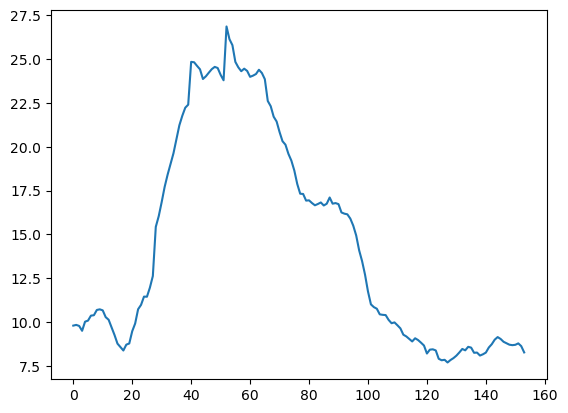

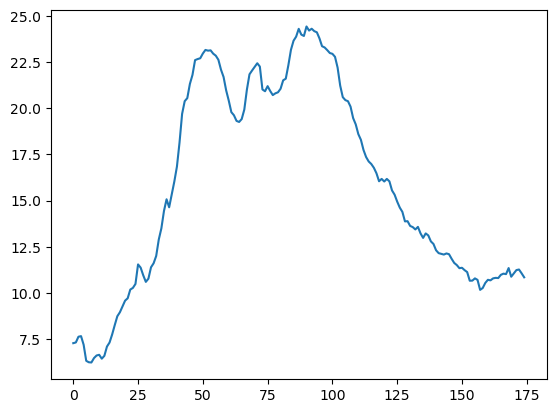

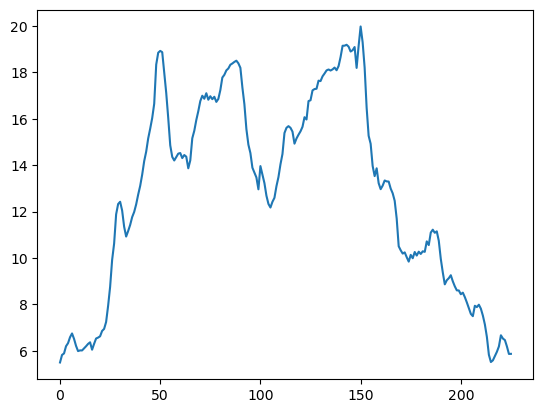

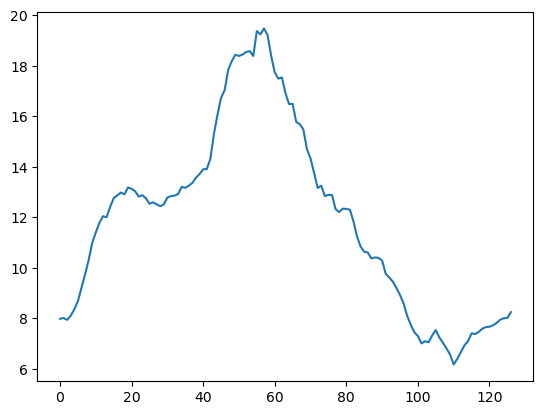

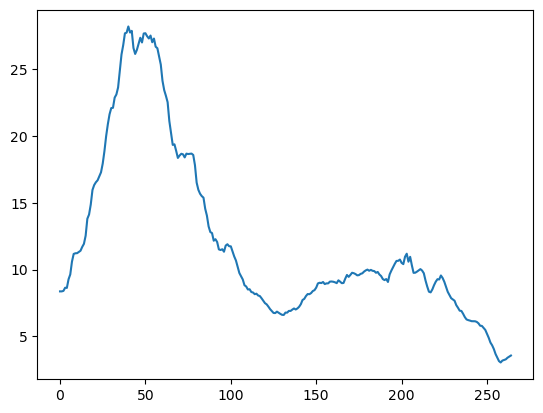

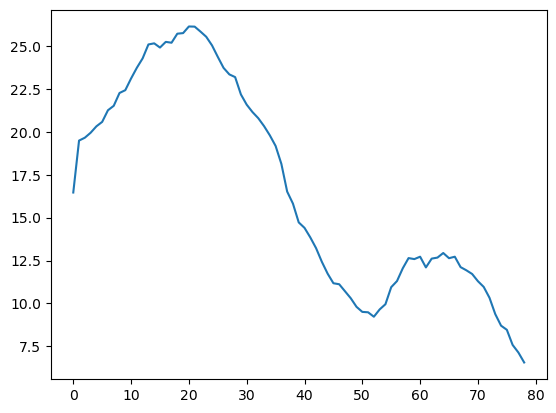

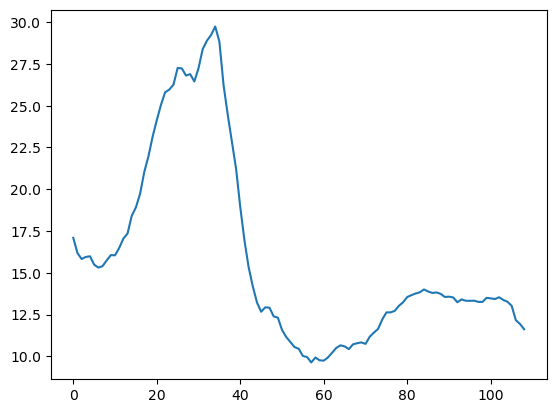

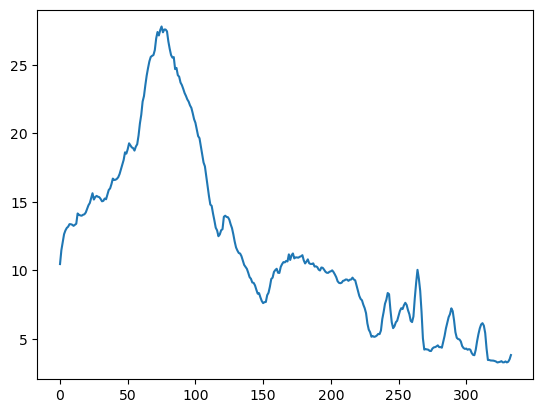

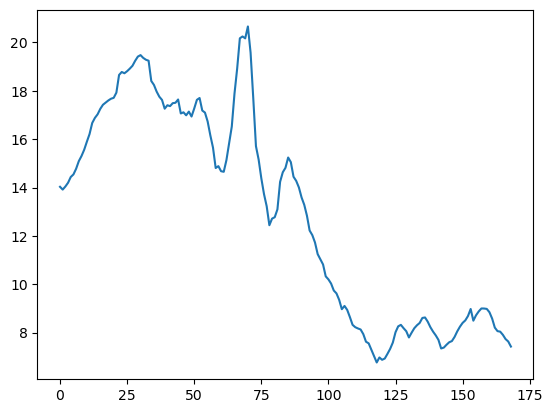

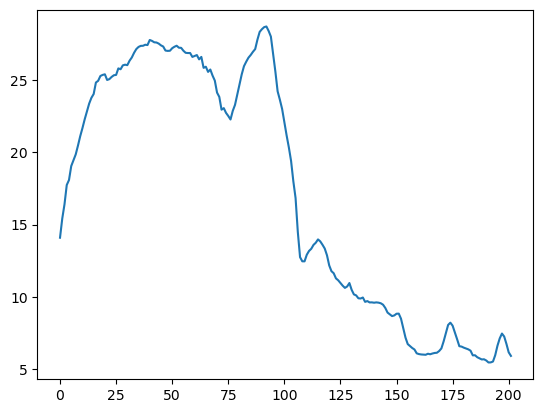

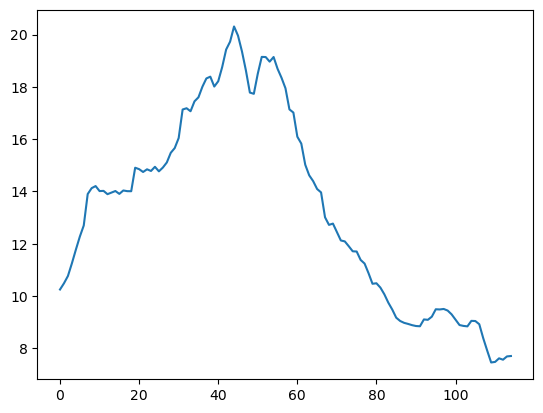

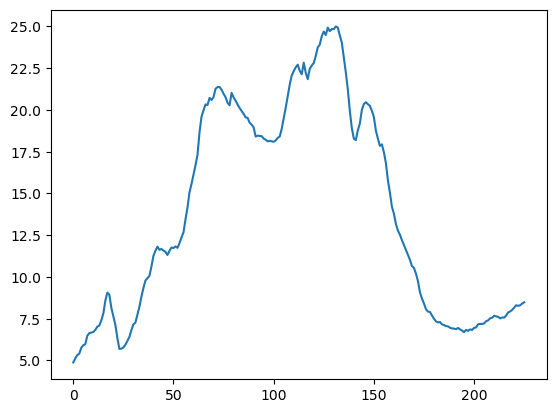

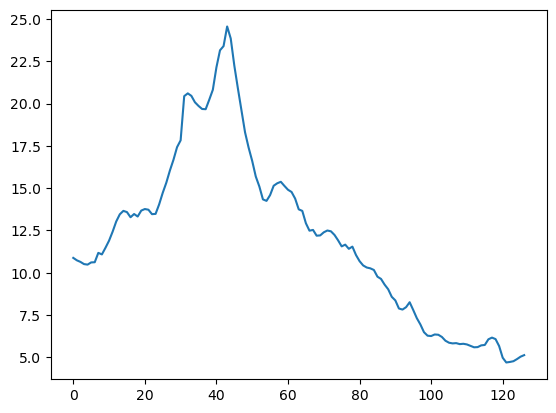

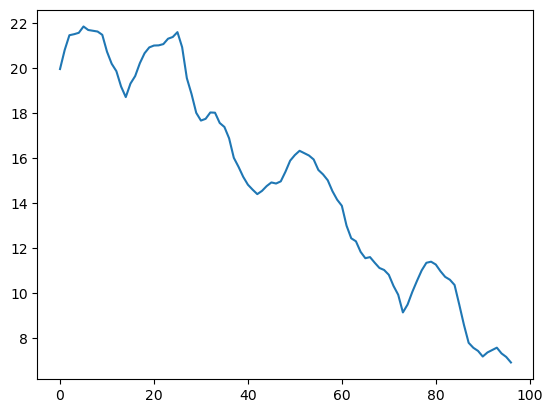

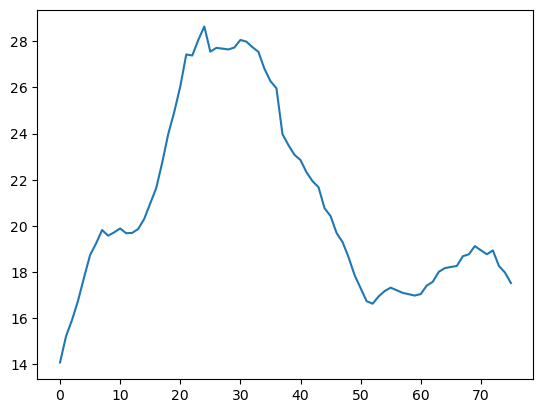

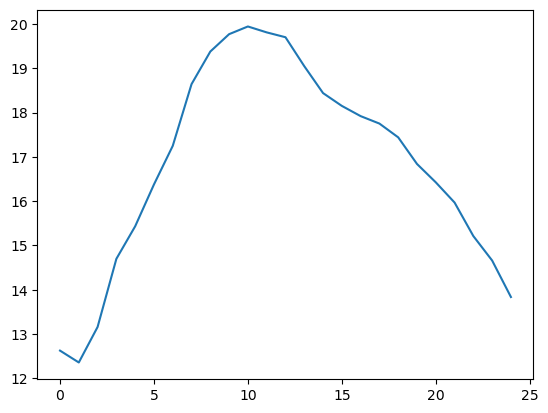

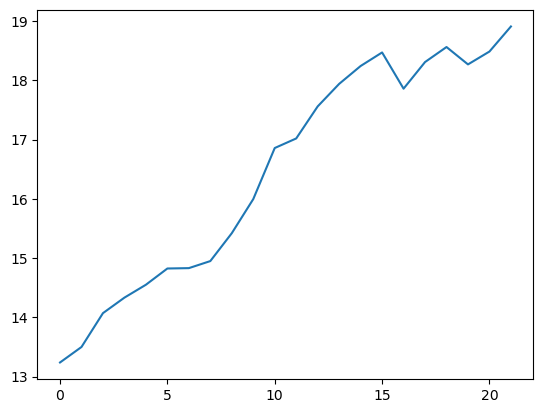

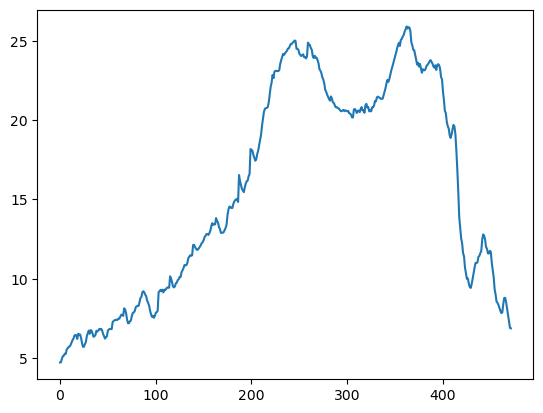

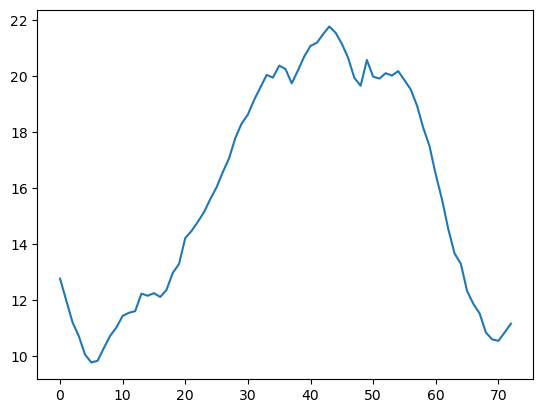

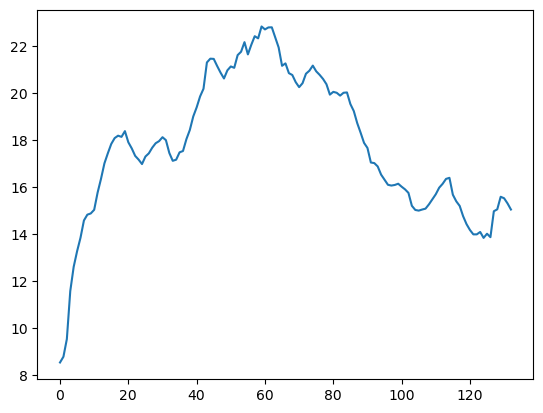

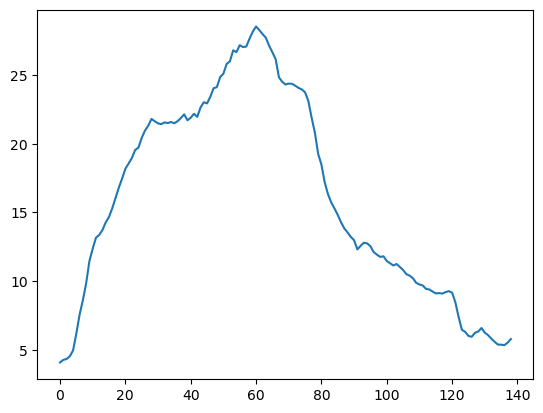

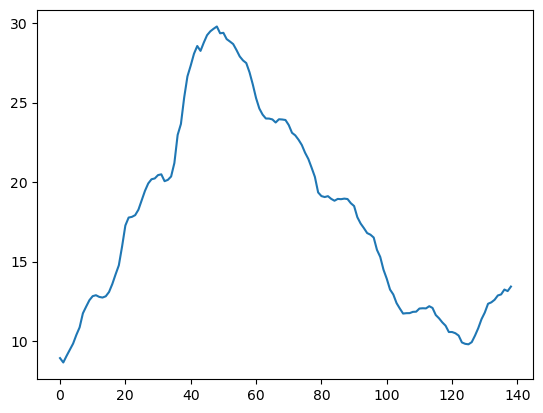

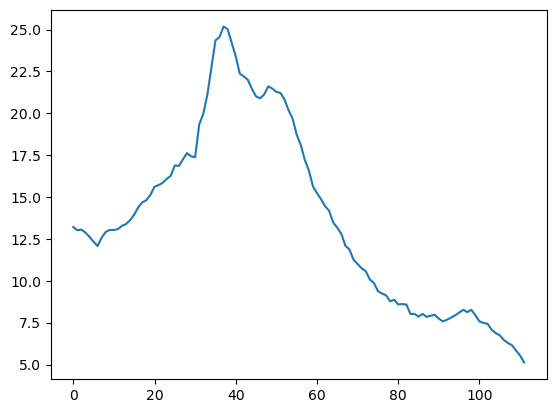

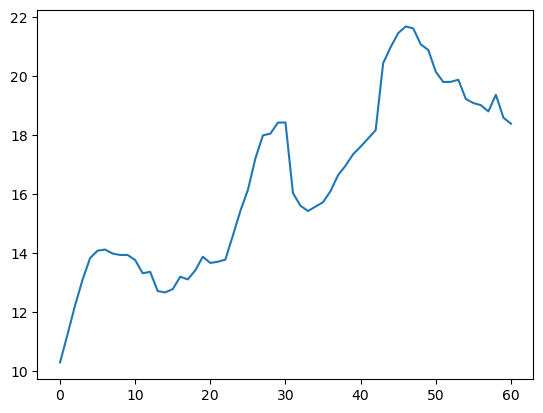

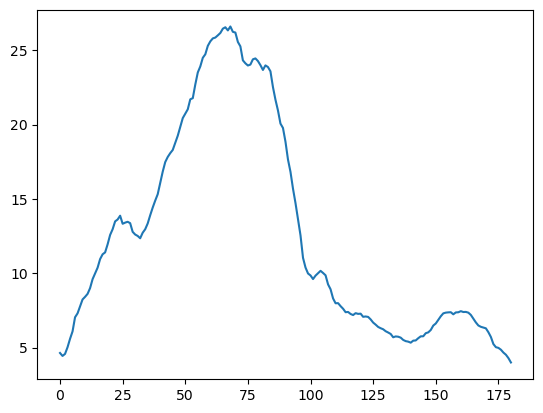

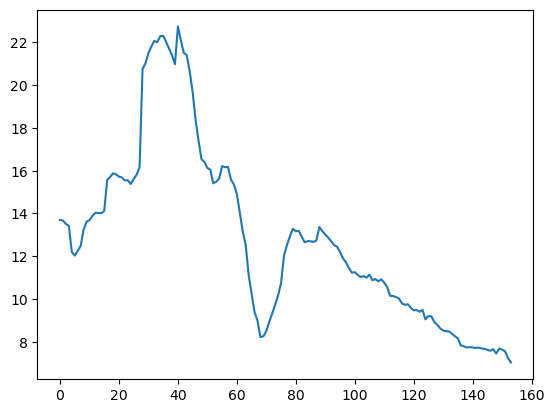

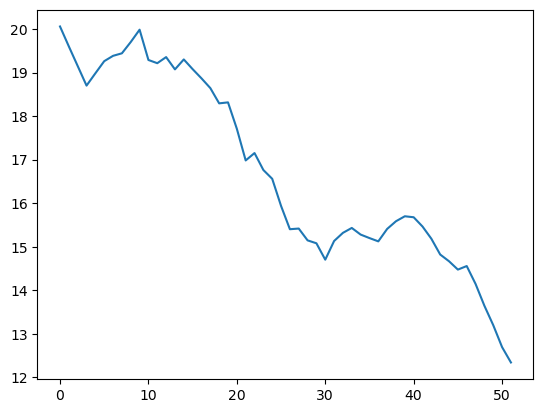

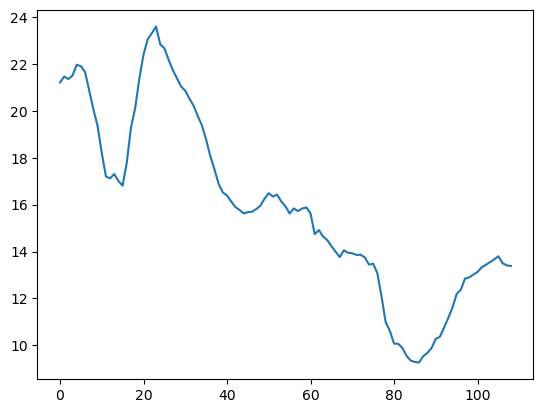

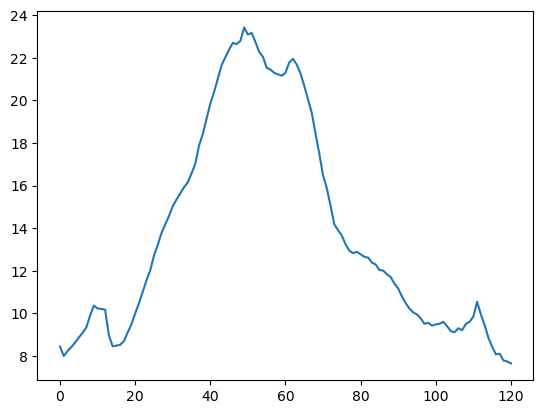

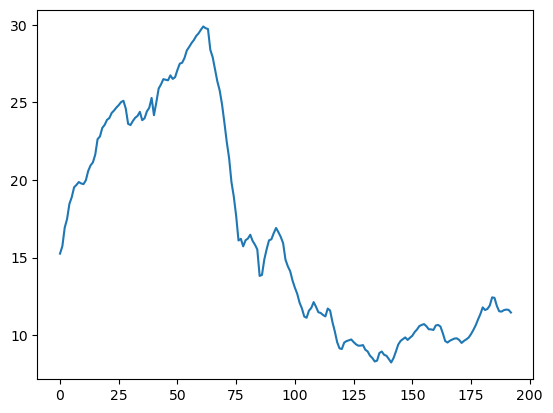

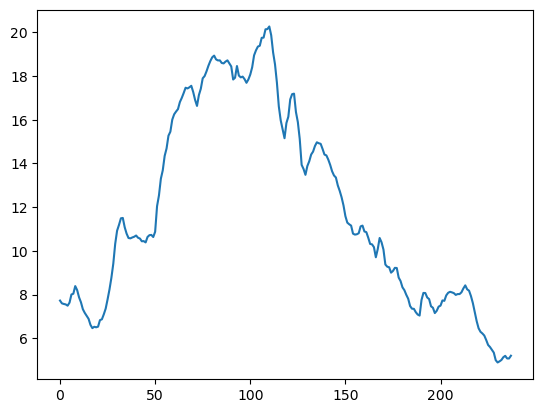

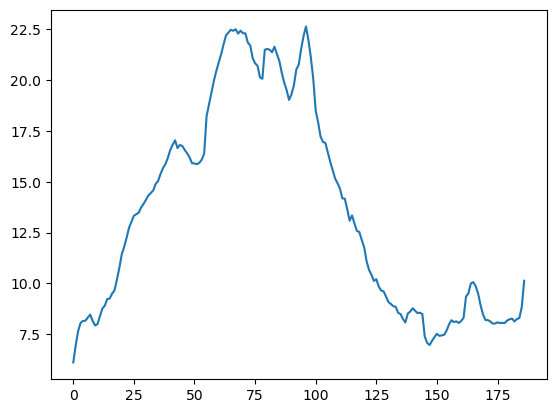

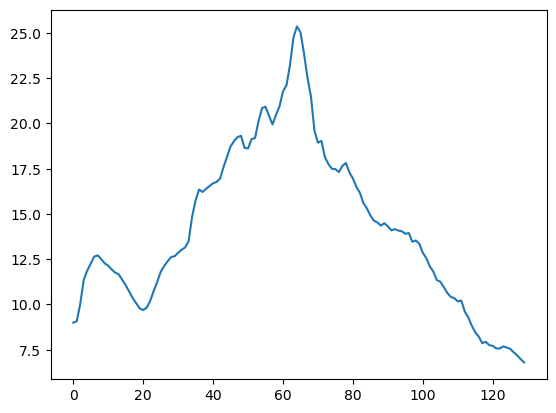

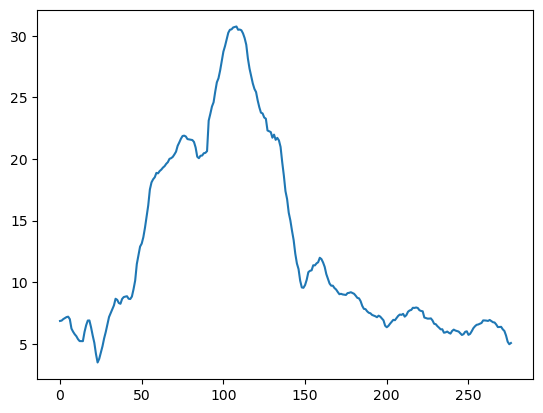

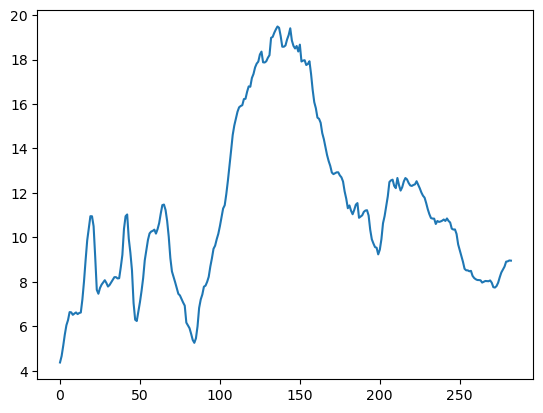

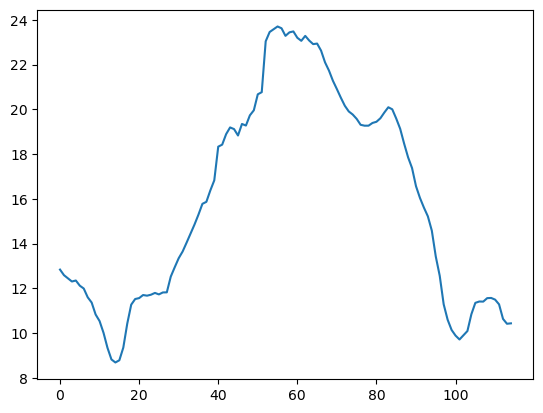

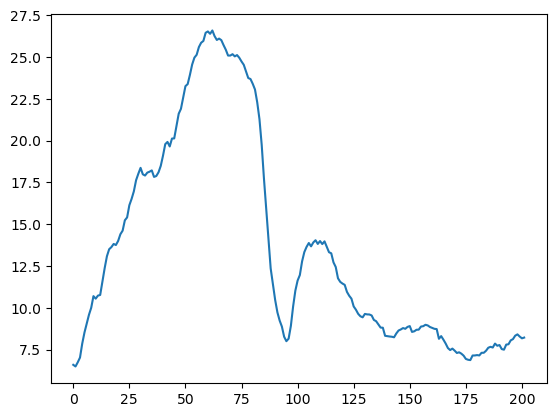

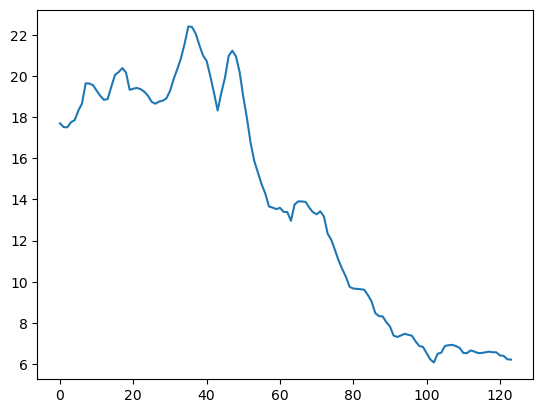

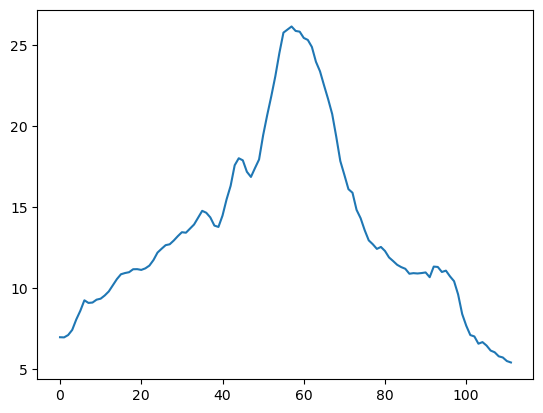

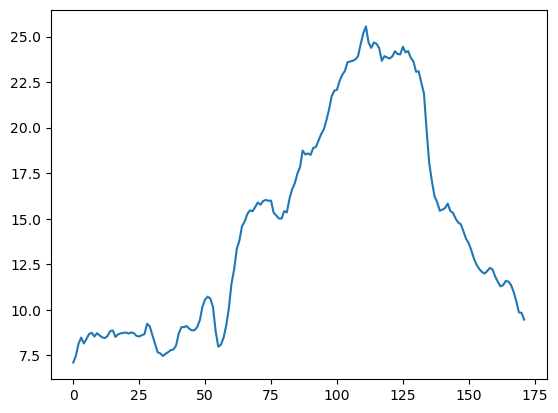

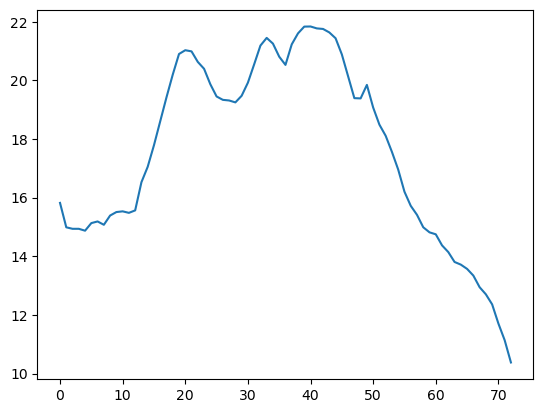

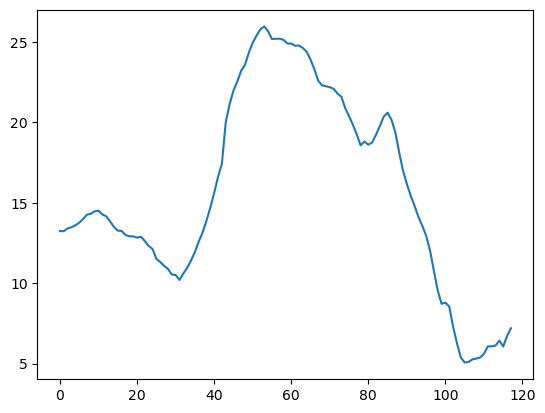

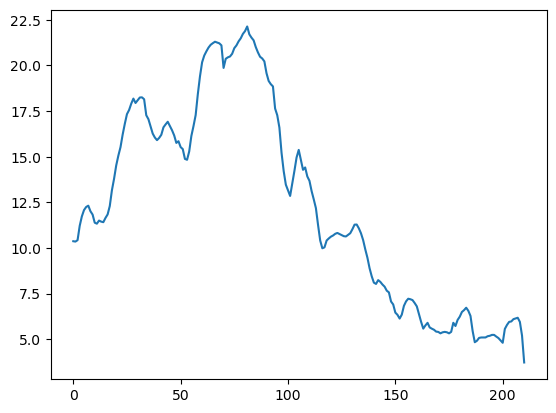

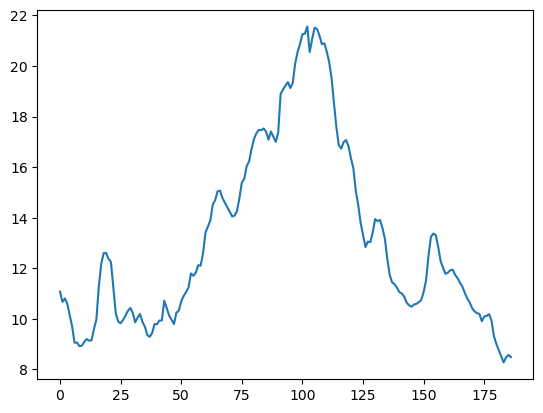

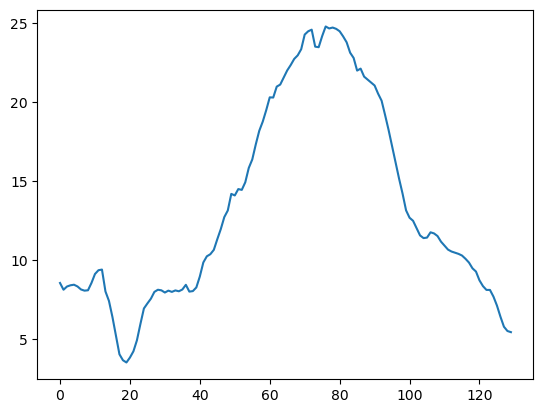

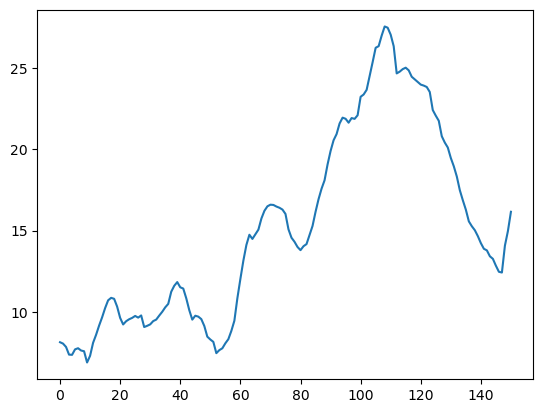

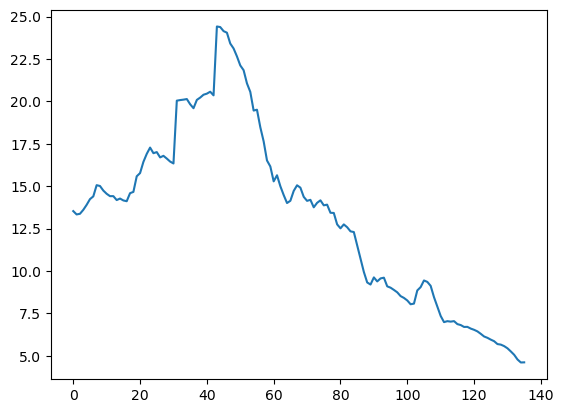

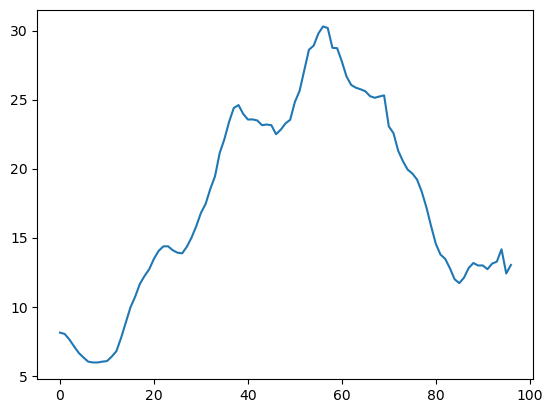

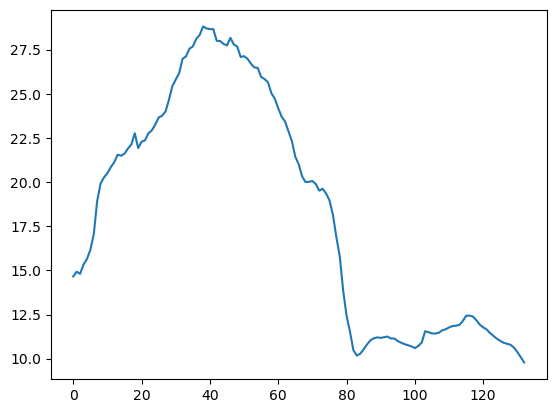

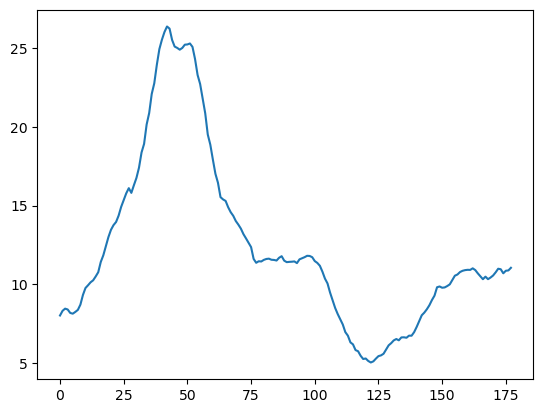

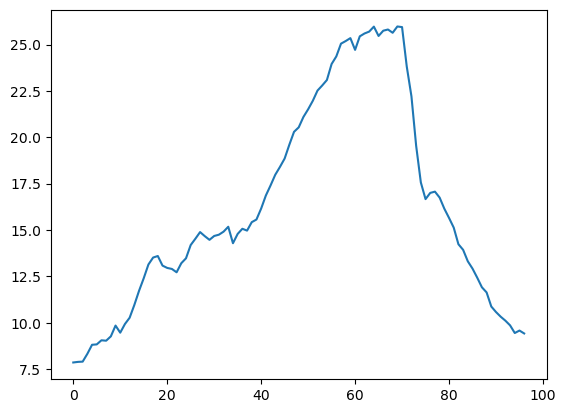

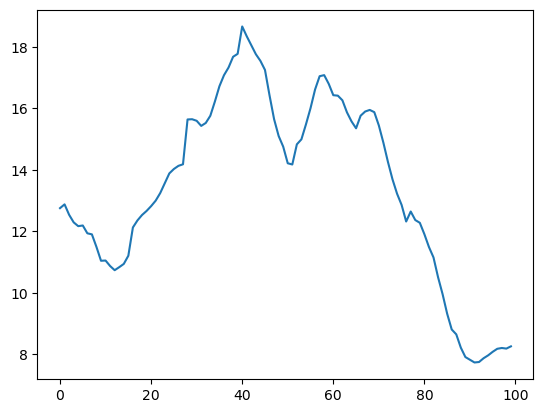

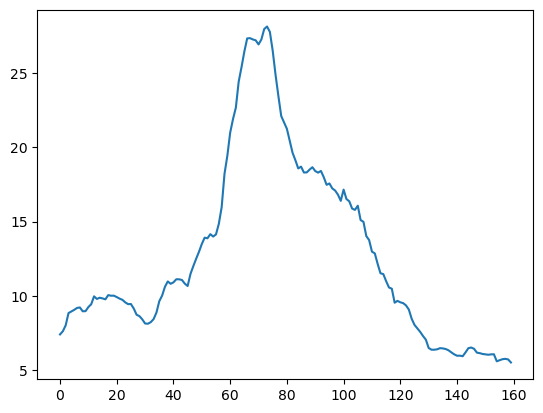

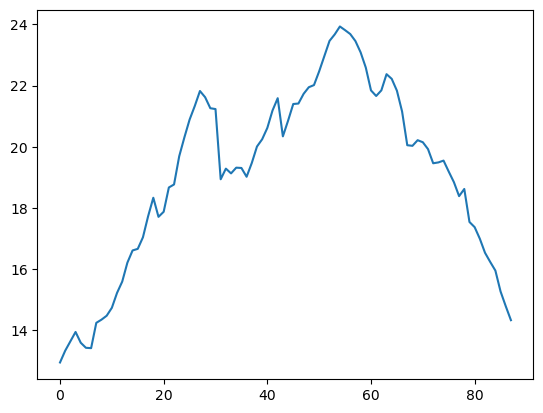

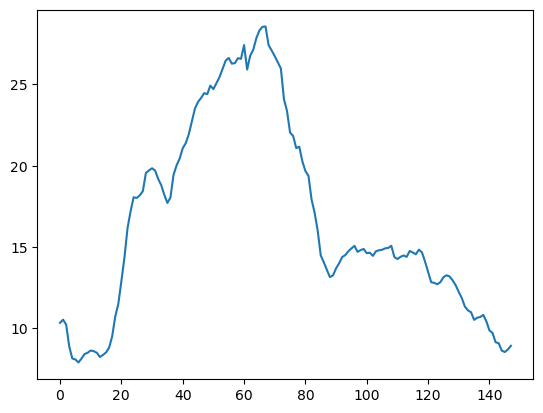

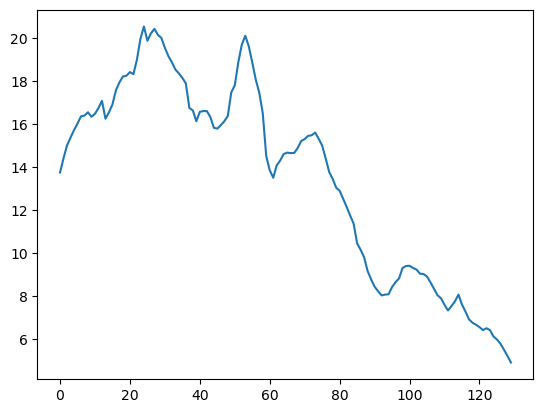

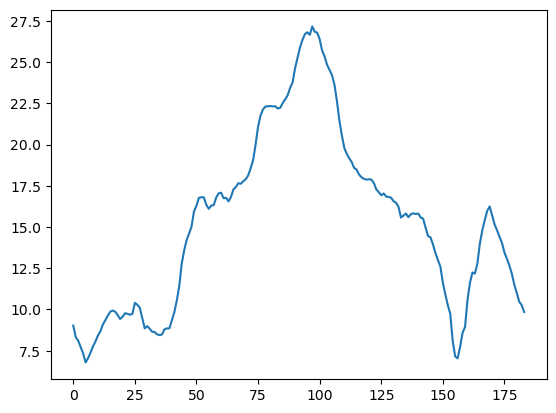

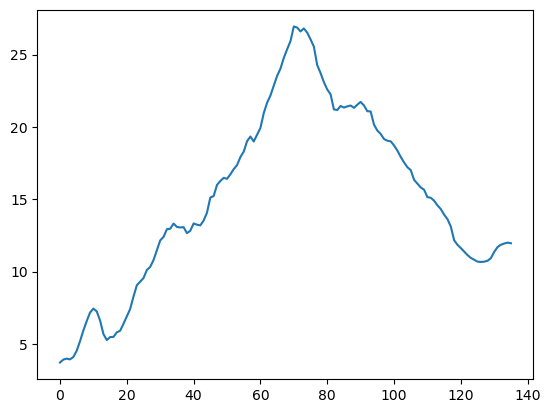

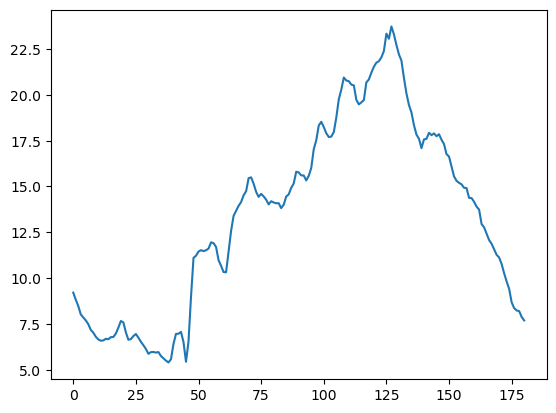

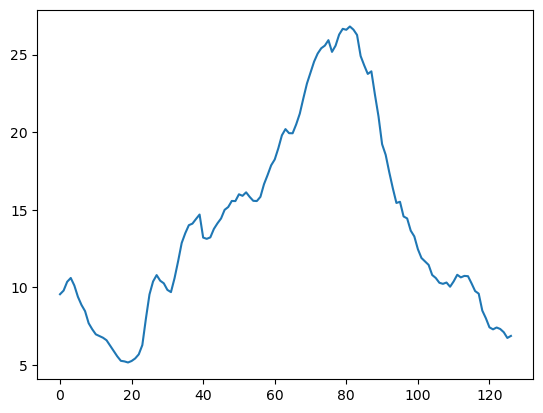

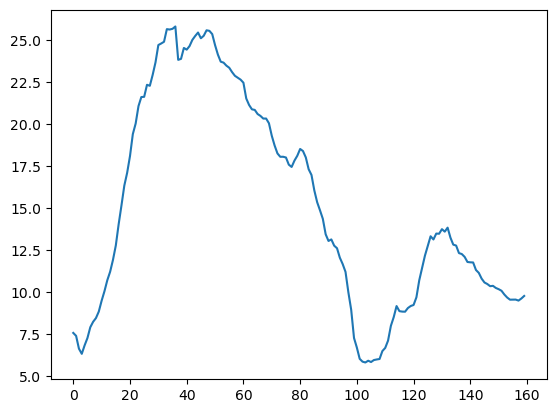

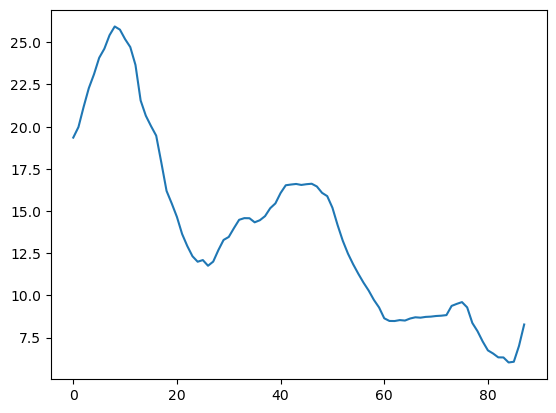

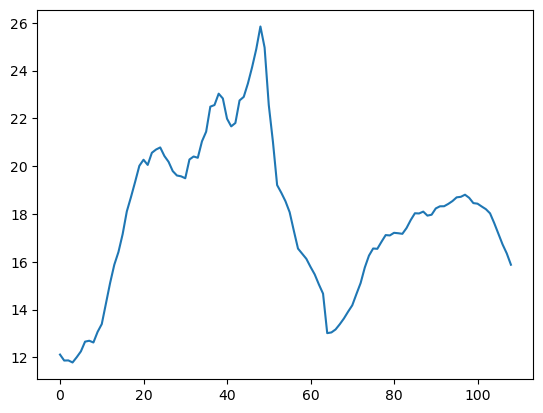

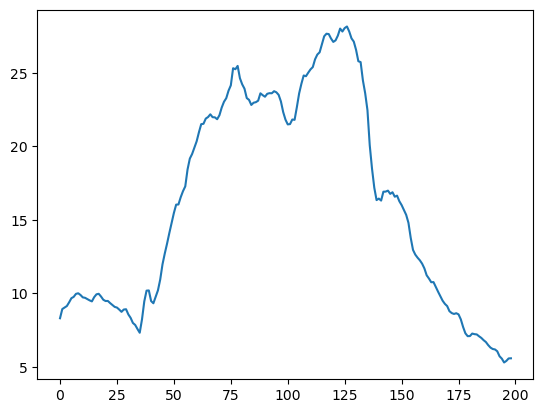

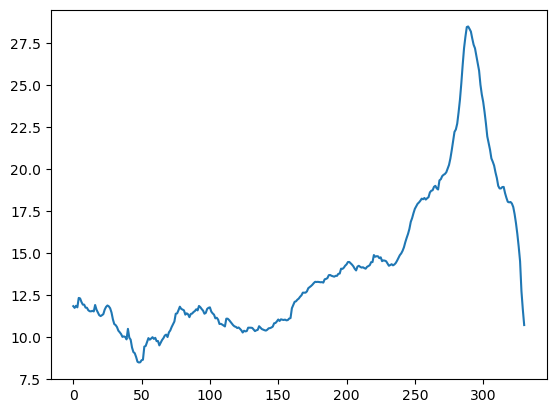

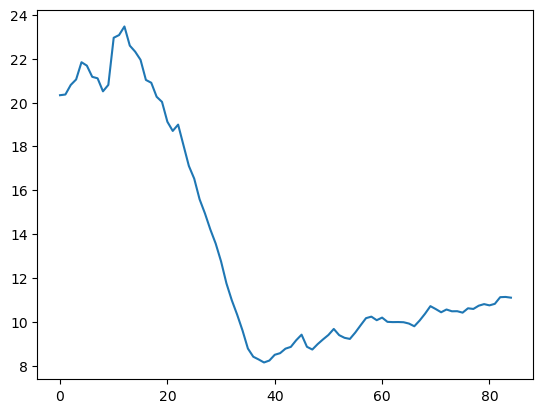

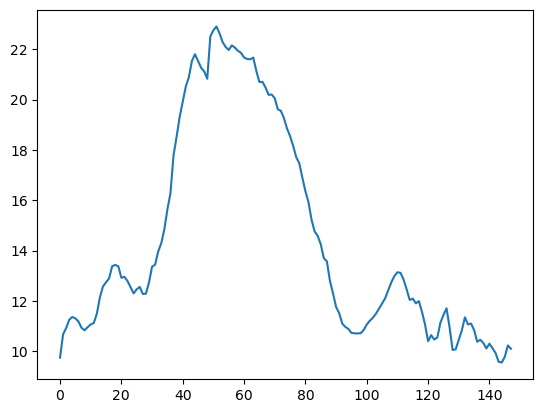

In [51]:
# plot the first storm of the y_train to be sure it is the right variable

import matplotlib.pyplot as plt
for i in range(0,67):
    plt.plot(y_train[i,:])
    plt.show()

# it works !

In [53]:
# save the data using pickle

np.save(f'{path}DATASETS/X_y/X_train.npy', X_train)
np.save(f'{path}DATASETS/X_y/X_validation.npy', X_validation)
np.save(f'{path}DATASETS/X_y/X_test.npy', X_test)

np.save(f'{path}DATASETS/X_y/y_train.npy', y_train)
np.save(f'{path}DATASETS/X_y/y_validation.npy', y_validation)
np.save(f'{path}DATASETS/X_y/y_test.npy', y_test)

In [54]:
# check if the data is saved correctly

X_train = np.load(f'{path}DATASETS/X_y/X_train.npy')
X_validation = np.load(f'{path}DATASETS/X_y/X_validation.npy')
X_test = np.load(f'{path}DATASETS/X_y/X_test.npy')

y_train = np.load(f'{path}DATASETS/X_y/y_train.npy')
y_validation = np.load(f'{path}DATASETS/X_y/y_validation.npy')
y_test = np.load(f'{path}DATASETS/X_y/y_test.npy')
